In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

### İmport ettiğimiz veri setini kendim rastgele değerler kullanarak oluşturdum. Bu yüzden veriler gerçek hayat senaryosuna uygun değildir. Bu veri setini kullanarak sınıflandırma problemlerinde kullanılan tüm algoritmaları ele alacağız.

In [2]:
data = pd.read_csv('musteri_terk.csv')
data.head()

,Müşteri ID,Yaş,Cinsiyet,Gelir Düzeyi,İnternet Kullanımı,Müşteri Terk Durumu
0,0,18,Erkek,Düşük,Yüksek,1
1,1,43,Erkek,Orta,Yüksek,1
2,2,37,Kadın,Düşük,Yüksek,0
3,3,33,Erkek,Yüksek,Orta,0
4,4,27,Kadın,Orta,Orta,1


#### Müşteri Terk Durumu 0: Terk Etmedi
#### Müşteri Terk Durumu 1: Terk Etti

# Veri Analizi

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Müşteri ID,500.0,249.500,144.481833,0.0,124.75,249.5,374.25,499.0
Yaş,500.0,30.874,7.974290,18.0,24.00,31.0,38.00,44.0
Müşteri Terk Durumu,500.0,0.530,0.499599,0.0,0.00,1.0,1.00,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Müşteri ID           500 non-null    int64 
 1   Yaş                  500 non-null    int64 
 2   Cinsiyet             500 non-null    object
 3   Gelir Düzeyi         500 non-null    object
 4   İnternet Kullanımı   500 non-null    object
 5   Müşteri Terk Durumu  500 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 23.6+ KB


In [5]:
data.var(numeric_only=True)

Müşteri ID             20875.000000
Yaş                       63.589303
Müşteri Terk Durumu        0.249599
dtype: float64

In [6]:
data.corr()

,Müşteri ID,Yaş,Müşteri Terk Durumu
Müşteri ID,1.000000,0.088182,-0.042880
Yaş,0.088182,1.000000,0.010257
Müşteri Terk Durumu,-0.042880,0.010257,1.000000


In [7]:
data.isnull().any().sum()

0

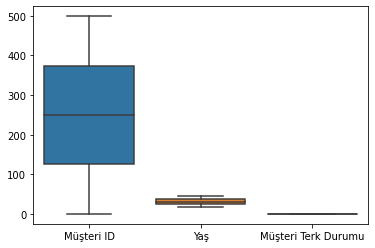

In [8]:
sns.boxplot(data=data);

# Veri Görselleştirme

### Bu kısımda seaborn ve matplotlib framework 'lerini pratik edebilmek ve veri setini güzel kavrayabilmek için olabildiğince grafik oluşturacağız.

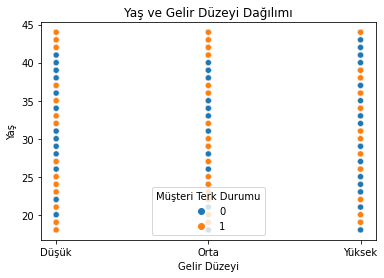

In [9]:
sns.scatterplot(data=data, x='Gelir Düzeyi', y='Yaş', hue='Müşteri Terk Durumu')
plt.title('Yaş ve Gelir Düzeyi Dağılımı')
plt.xlabel('Gelir Düzeyi')
plt.ylabel('Yaş')
plt.show()

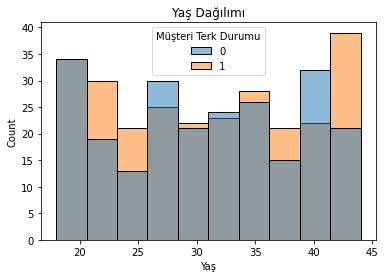

In [10]:
sns.histplot(data=data, x='Yaş', bins=10, hue='Müşteri Terk Durumu')
plt.title('Yaş Dağılımı')
plt.show()

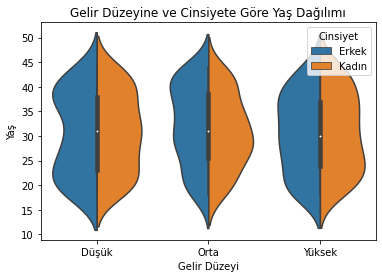

In [11]:
sns.violinplot(data=data, x='Gelir Düzeyi', y='Yaş', hue='Cinsiyet', split=True)
plt.title('Gelir Düzeyine ve Cinsiyete Göre Yaş Dağılımı')
plt.show()

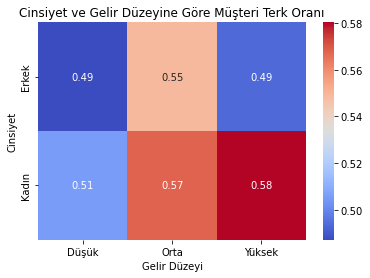

In [12]:
pivot_table = data.pivot_table(index='Cinsiyet', columns='Gelir Düzeyi', values='Müşteri Terk Durumu', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cinsiyet ve Gelir Düzeyine Göre Müşteri Terk Oranı')
plt.show()

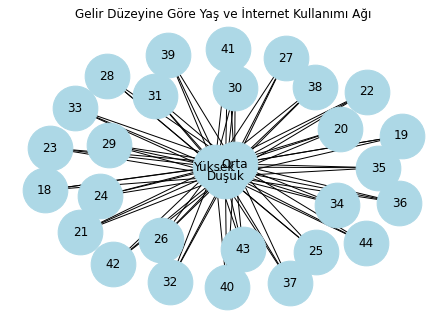

In [13]:
import networkx as nx
graph_data = data[['Yaş', 'İnternet Kullanımı', 'Gelir Düzeyi']]
graph = nx.from_pandas_edgelist(graph_data, source='Yaş', target='İnternet Kullanımı', edge_attr='Gelir Düzeyi')
nx.draw(graph, with_labels=True, node_size=2000, node_color='lightblue', font_color='black')
plt.title('Gelir Düzeyine Göre Yaş ve İnternet Kullanımı Ağı')
plt.show()

# Veri Ön İşleme

In [14]:
from sklearn.preprocessing import StandardScaler

### Bu bölümde kategorik değişkenleri numerik değişkenlere dönüştüreceğiz. Daha sonra bağımsız değişkenleri standartlaştırma işlemine tabi tutacağız. Eksik ve aykırı gözlem olmadığı için başka bir şey yapmayacağız.

In [15]:
data.head()

,Müşteri ID,Yaş,Cinsiyet,Gelir Düzeyi,İnternet Kullanımı,Müşteri Terk Durumu
0,0,18,Erkek,Düşük,Yüksek,1
1,1,43,Erkek,Orta,Yüksek,1
2,2,37,Kadın,Düşük,Yüksek,0
3,3,33,Erkek,Yüksek,Orta,0
4,4,27,Kadın,Orta,Orta,1


In [16]:
scaler = StandardScaler()

# Kategorik değişkenleri nümerik değişkenlere dönüştürelim.
data['Cinsiyet'] = data['Cinsiyet'].map({'Erkek':1, 'Kadın':0})
data['Gelir Düzeyi'] = data['Gelir Düzeyi'].map({'Düşük':0, 'Orta':1, 'Yüksek':2})
data['İnternet Kullanımı'] = data['İnternet Kullanımı'].map({'Düşük':0, 'Orta':1, 'Yüksek':2})

In [17]:
data.head()

,Müşteri ID,Yaş,Cinsiyet,Gelir Düzeyi,İnternet Kullanımı,Müşteri Terk Durumu
0,0,18,1,0,2,1
1,1,43,1,1,2,1
2,2,37,0,0,2,0
3,3,33,1,2,1,0
4,4,27,0,1,1,1


In [18]:
# Değişkenler üzerinde standartlaştırma işlemi yapalım.
data['Cinsiyet'] = scaler.fit_transform(data[['Cinsiyet']].values.reshape(-1, 1))
data['Gelir Düzeyi'] = scaler.fit_transform(data[['Gelir Düzeyi']].values.reshape(-1, 1))
data['İnternet Kullanımı'] = scaler.fit_transform(data[['İnternet Kullanımı']].values.reshape(-1, 1))
data['Yaş'] = scaler.fit_transform(data[['İnternet Kullanımı']].values.reshape(-1, 1))

In [19]:
data.head()

,Müşteri ID,Yaş,Cinsiyet,Gelir Düzeyi,İnternet Kullanımı,Müşteri Terk Durumu
0,0,1.186724,1.045012,-1.177660,1.186724,1
1,1,1.186724,1.045012,0.041450,1.186724,1
2,2,1.186724,-0.956927,-1.177660,1.186724,0
3,3,-0.049447,1.045012,1.260559,-0.049447,0
4,4,-0.049447,-0.956927,0.041450,-0.049447,1


# Model İşlemleri

In [22]:
# Bağımlı ve Bağımsız Değişkenleri Oluşturalım.
X = data.drop(['Müşteri ID', 'Müşteri Terk Durumu'], axis=1)
y = data['Müşteri Terk Durumu']

In [25]:
# Eğitim ve test setlerini ayıralım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
#---------------------------------------------------------------------------------------------

## Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
# Modeli Oluşturalım ve eğitelim.
lr_model = LogisticRegression().fit(X_train, y_train)

# Tahmin yapalım.
lr_pred = lr_model.predict(X_test)

# Modeli değerlendirelim.
accuracy = accuracy_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
confusion = confusion_matrix(y_test, lr_pred)

print('Accuracy Score: ', accuracy)
print('F1-Score: ', f1)
print('Confusion Matrix:\n', confusion)

Accuracy Score:  0.51
F1-Score:  0.6474820143884893
Confusion Matrix:
 [[ 6 38]
 [11 45]]


In [70]:
lr_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [71]:
# Model Doğrulama
scores = cross_val_score(lr_model, X, y, cv=10)
print('Scores: ', scores)
print('Mean of Scores: ', scores.mean())

Scores:  [0.6  0.44 0.5  0.54 0.6  0.46 0.52 0.48 0.52 0.56]
Mean of Scores:  0.522


In [72]:
#---------------------------------------------------------------------------

## Classifier and Regressor Tress (CART)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
# Modeli Oluşturalım ve Eğitelim.
cart_model = DecisionTreeClassifier().fit(X_train, y_train)

# Tahmin Yapalım.
cart_pred = cart_model.predict(X_test)

# Modeli Değerlendirelim.
accuracy = accuracy_score(y_test, cart_pred)
confusion = confusion_matrix(y_test, cart_pred)
f1 = f1_score(y_test, cart_pred)

print('Accuracy Score: ', accuracy)
print('F1-Score: ', f1)
print('Confusion Matrix:\n', confusion)

Accuracy Score:  0.51
F1-Score:  0.5882352941176471
Confusion Matrix:
 [[16 28]
 [21 35]]


In [33]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [34]:
# Model Doğrulama
scores = cross_val_score(cart_model, X, y, cv=5)
print('Scores: ', scores)
print('Mean of Scores: ', scores.mean())

Scores:  [0.51 0.52 0.53 0.5  0.5 ]
Mean of Scores:  0.512


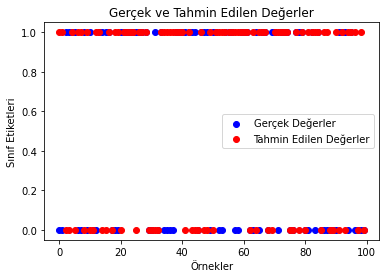

In [35]:
plt.scatter(range(len(y_test)), y_test, c='b', label='Gerçek Değerler')
plt.scatter(range(len(cart_pred)), cart_pred, c='r', label='Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.xlabel('Örnekler')
plt.ylabel('Sınıf Etiketleri')
plt.legend()
plt.show()

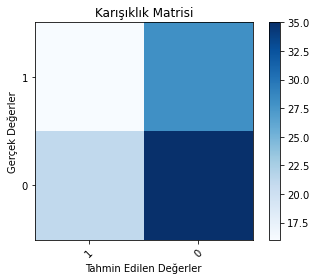

In [36]:
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(np.arange(len([1, 0])), [1, 0], rotation=45)
plt.yticks(np.arange(len([1, 0])), [1, 0])
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Gerçek Değerler')
plt.title('Karışıklık Matrisi')
plt.show()

In [74]:
#---------------------------------------------------------------------------------------

## Random Forest Classifier (RF)

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
# Modeli Oluşturalım ve Eğitelim.
rf_model = RandomForestClassifier().fit(X_train, y_train)

# Tahmin Yapalım.
rf_pred = rf_model.predict(X_test)

# Modeli Değerlendirelim.
accuracy = accuracy_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
confusion = confusion_matrix(y_test, rf_pred)

print('Accuracy Score: ', accuracy)
print('F1-Score: ', f1)
print('Confusion Matrix:\n', confusion)

Accuracy Score:  0.54
F1-Score:  0.6229508196721312
Confusion Matrix:
 [[16 28]
 [18 38]]


In [46]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [47]:
# Model Doğrulama
scores = cross_val_score(rf_model, X, y, cv=10)
print('Scores: ', scores)
print('Mean of Scores: ', scores.mean())

Scores:  [0.5  0.62 0.5  0.54 0.64 0.58 0.54 0.54 0.56 0.52]
Mean of Scores:  0.5539999999999999


In [75]:
# ----------------------------------------------------------------------------------

## Gradient Boosting Machine Classifier (GBM)

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
# Model oluşturalım ve eğitelim.
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

# Tahmin yapalım.
gbm_pred = gbm_model.predict(X_test)

# Modeli değerlendirelim.
accuracy = accuracy_score(y_test, gbm_pred)
f1 = f1_score(y_test, gbm_pred)
confusion = confusion_matrix(y_test, gbm_pred)

print('Accuracy Score: ', accuracy)
print('F1-Score: ', f1)
print('Confusion Matrix:\n', confusion)

Accuracy Score:  0.54
F1-Score:  0.6229508196721312
Confusion Matrix:
 [[16 28]
 [18 38]]


In [54]:
gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [55]:
# Model Doğrulama
scores = cross_val_score(gbm_model, X, y, cv=10)
print('Scores: ', scores)
print('Mean of Scores: ', scores.mean())

Scores:  [0.48 0.58 0.48 0.54 0.68 0.58 0.54 0.52 0.54 0.52]
Mean of Scores:  0.546


In [76]:
# -----------------------------------------------------------------------------------

## Extreme Gradient Boosting Machines (XGB)

In [56]:
from xgboost import  XGBClassifier

In [57]:
# Modeli oluşturalım ve eğitelim.
xgb_model = XGBClassifier().fit(X_train, y_train)

# Tahmin yapalım.
xgb_pred = xgb_model.predict(X_test)

# Modeli değerlendirelim.
accuracy = accuracy_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
confusion = confusion_matrix(y_test, xgb_pred)

print('Accuracy Score: ', accuracy)
print('F1-Score: ', f1)
print('Confusion Matrix:\n', confusion)

Accuracy Score:  0.54
F1-Score:  0.6229508196721312
Confusion Matrix:
 [[16 28]
 [18 38]]


In [58]:
xgb_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [59]:
# Model Doğrulama
scores = cross_val_score(xgb_model, X, y, cv=10)
print('Scores: ', scores)
print('Mean of Scores: ', scores.mean())

Scores:  [0.5  0.58 0.48 0.54 0.62 0.58 0.52 0.52 0.56 0.46]
Mean of Scores:  0.536


In [77]:
# -------------------------------------------------------------------------------

## Light Gradient Boosting Machines (LGB)

In [60]:
from lightgbm import LGBMClassifier

In [62]:
# Modeli oluşturalım ve eğitelim.
lgbm_model = LGBMClassifier().fit(X_train, y_train)

# Tahmin yapalım.
lgbm_pred = lgbm_model.predict(X_test)

# Modeli değerlendirelim.
accuracy = accuracy_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
confusion = confusion_matrix(y_test, lgbm_pred)

print('Accuracy Score: ', accuracy)
print('F1-Score: ', f1)
print('Confusion Matrix:\n', confusion)

Accuracy Score:  0.54
F1-Score:  0.6229508196721312
Confusion Matrix:
 [[16 28]
 [18 38]]


In [63]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [64]:
# Model Doğrulama
scores = cross_val_score(lgbm_model, X, y, cv=10)
print('Scores: ', scores)
print('Mean of Scores: ', scores.mean())

Scores:  [0.5  0.62 0.48 0.54 0.62 0.58 0.52 0.52 0.56 0.46]
Mean of Scores:  0.5400000000000001


In [78]:
# -----------------------------------------------------------------------------

## Cat Boost

In [65]:
from catboost import CatBoostClassifier

In [67]:
# Modeli oluşturalım ve eğitelim.
cb_model = CatBoostClassifier().fit(X_train, y_train, verbose=False)

# Tahmin yapalım.
cb_pred = cb_model.predict(X_test)

# Modeli değerlendirelim.
accuracy = accuracy_score(y_test, cb_pred)
f1 = f1_score(y_test, cb_pred)
confusion = confusion_matrix(y_test, cb_pred)

print('Accuracy Score: ', accuracy)
print('F1-Score: ', f1)
print('Confusion Matrix:\n', confusion)

Accuracy Score:  0.54
F1-Score:  0.6229508196721312
Confusion Matrix:
 [[16 28]
 [18 38]]


In [80]:
#-----------------------------------------------------------------------------------

## Tüm Modellerin Karşılaştırılması

In [84]:
models = [
    lr_model,
    cart_model,
    rf_model,
    gbm_model,
    xgb_model,
    lgbm_model,
    cb_model
]

for model in models:
    model_name = model.__class__.__name__
    model_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, model_pred)
    f1 = f1_score(y_test, model_pred)
    print(f'{model_name}:  Accuracy Score:{accuracy},     F1-Score:{f1}')

LogisticRegression:  Accuracy Score:0.51,     F1-Score:0.6474820143884893
DecisionTreeClassifier:  Accuracy Score:0.51,     F1-Score:0.5882352941176471
RandomForestClassifier:  Accuracy Score:0.54,     F1-Score:0.6229508196721312
GradientBoostingClassifier:  Accuracy Score:0.54,     F1-Score:0.6229508196721312
XGBClassifier:  Accuracy Score:0.54,     F1-Score:0.6229508196721312
LGBMClassifier:  Accuracy Score:0.54,     F1-Score:0.6229508196721312
CatBoostClassifier:  Accuracy Score:0.54,     F1-Score:0.6229508196721312
